# An example using Feature weighted ECM clustering


In [3]:
## Importing
import numpy as np
import matplotlib.pyplot as plt
from evclust.ecm import ecm
from evclust.fwecm import fwecm
from evclust.utils import ev_summary, ev_plot, ev_pcaplot
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.metrics import adjusted_rand_score, silhouette_score


[[ 0.45425472  0.85611164  1.66566307  0.01127201  0.3406683   2.10998801]
 [ 2.05759895  2.34727594  0.76940815  3.00709886  1.24107766  0.76651857]
 [ 1.40567768  1.29997189 -1.02427664  1.45333867  1.70265669 -0.44290229]
 [ 0.06816923 -0.12461475 -0.27753277  0.44855791  0.98226466  1.00324154]
 [ 0.24690975  0.85163271  0.14701856  1.0187255   0.83501573  3.21148094]
 [ 0.56425558 -0.07242742  0.65490671  1.19131337  0.6533221   0.18386899]
 [ 1.26325652  1.76017258  0.6315267   1.8801643   1.5473025   3.241316  ]
 [-0.11590392  2.42055121  2.0608206  -1.66012447 -0.04586055  1.69915732]
 [ 0.9486547   2.81564163  1.37207302  0.14377091  0.19746371 -0.17172524]
 [ 1.78306099  2.51440611  2.37347799  1.43206615  0.678735    1.05544085]]


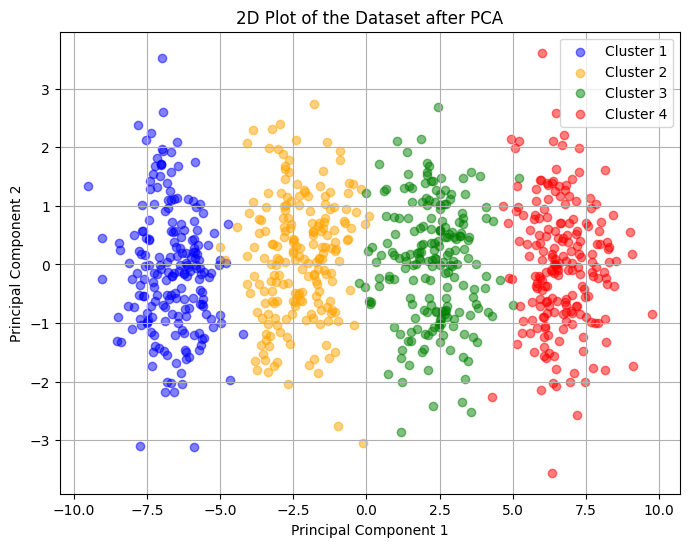

In [4]:
## Generating data set
# Number of points in each cluster
num_points = 200

# Number of dimensions for each point
num_dimensions = 6

# Mean and covariance matrices for each cluster
cluster_params = [
    {"mean": [1, 1, 1, 1, 1, 1], "covariance": np.eye(6)},
    {"mean": [3, 3, 3, 3, 3, 3], "covariance": np.eye(6)},
    {"mean": [5, 5, 5, 5, 5, 5], "covariance": np.eye(6)},
    {"mean": [7, 7, 7, 7, 7, 7], "covariance": np.eye(6)}
]

# Generate data for each cluster
dataset = np.concatenate(
    [np.random.multivariate_normal(params["mean"], params["covariance"], num_points) for params in cluster_params])
df = pd.DataFrame(data=dataset[:, :-1])

print(dataset[:10])

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions
data_reduced = pca.fit_transform(dataset[:, :-1])

# Plot the reduced dataset with different colors for each cluster
plt.figure(figsize=(8, 6))
colors = ['blue', 'orange', 'green', 'red']  # Define colors for clusters
for i, params in enumerate(cluster_params):
    plt.scatter(data_reduced[i * num_points:(i + 1) * num_points, 0],
                data_reduced[i * num_points:(i + 1) * num_points, 1],
                alpha=0.5,
                label=f'Cluster {i + 1}',
                c=colors[i])
plt.title('2D Plot of the Dataset after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

[1, 42.41444873173515]
[2, 39.606824226648634]
[3, 37.844945797048766]
[4, 36.811148249509536]
[5, 36.21656444225516]
[6, 35.82794717212524]
[7, 35.52952295858811]
[8, 35.268952676721014]
[9, 35.025405142795414]
[10, 34.78789494281776]
[11, 34.54678984129912]
[12, 34.30839491231069]
[13, 34.12116762281722]
[14, 33.99499576139353]
[15, 33.91960974112426]
[16, 33.87505022082049]
[17, 33.84748153229993]
[18, 33.829373467208626]
[19, 33.81675265230412]
[20, 33.80746746349853]
[21, 33.80030692996433]
[22, 33.79456087453919]
[23, 33.78979524066341]
[24, 33.78573380893014]
[25, 33.782193939616604]
[26, 33.77905054133324]
[27, 33.776215212563834]
[28, 33.77362377620149]
[29, 33.771228592792845]
[30, 33.76899367468633]
[31, 33.76689148957617]
[32, 33.76490081147207]
[33, 33.76300523772758]
[34, 33.761192138929104]
[35, 33.75945189482803]
[36, 33.757777321238095]
[37, 33.756163224788864]
[38, 33.75460604293754]
[39, 33.75310354041824]
[40, 33.751654543050755]
[41, 33.75025869705635]
[42, 33.7489

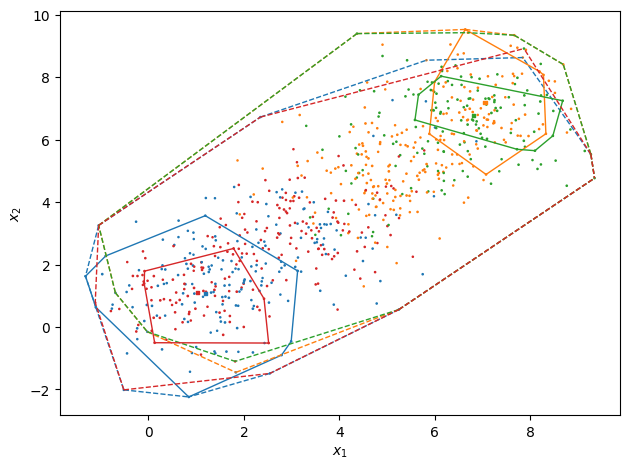

E:\STUDYing\Pre-Master\Study\Research Project\experiment\source-code\evclust\src\evclust\utils.py:875: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_coords = ind_coord.groupby('Cluster').mean()


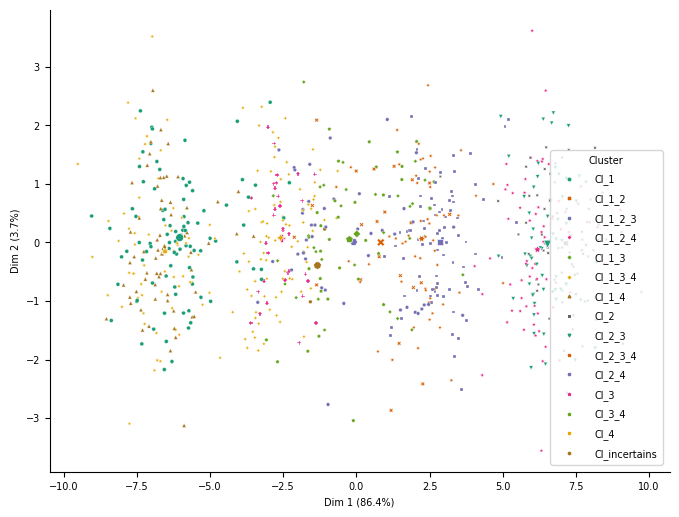

Adjusted Rand Index (ARI): 0.11921660653858127
Maximum Non-specificity value: 8.68209383416503
Minimum Non-specificity value: 0.3527336436356723


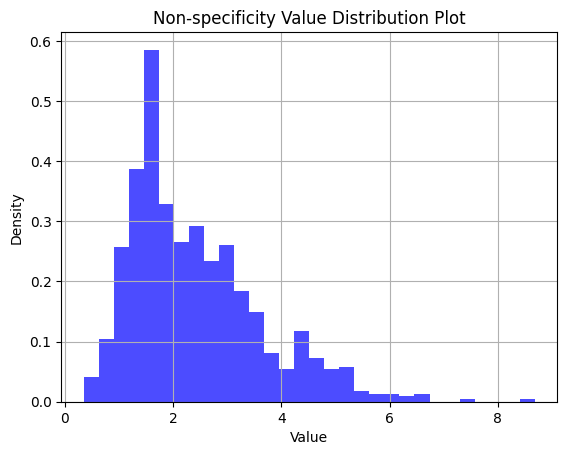

In [12]:
# Feature weighted ECM clustering
c=4
model = fwecm(x=df, c=c, beta=2, alpha=0.1, delta=9)

ev_plot(model, X=df)
ev_pcaplot(data=df, x=model, normalize=False)

# Compute the Adjusted Rand Index (ARI)
true_labels = dataset[:, -1].astype(int)
Y_betP = model['betp']
predicted_labels = np.argmax(Y_betP, axis=1)

ari = adjusted_rand_score(true_labels, predicted_labels)
print(f"Adjusted Rand Index (ARI): {ari}")

# Calculate Non-specificity for each object 
m = model['mass']
F = model['F']
card = np.sum(F[1:F.shape[0], :], axis=1)

log_card = np.log2(card)
tmp = np.tile(log_card.transpose(), (m.shape[0], 1))
m_log_card = m[:, :-1] * tmp

mvide = m[:, -1][:, np.newaxis]
tmp2 = mvide * np.log2(c)
tmp3 = np.tile(tmp2, (1, m.shape[1] - 1))

non_specificity = m_log_card + tmp3
object_non_specificity = np.sum(non_specificity, axis=1)

print(f"Maximum Non-specificity value: {max(object_non_specificity)}")
print(f"Minimum Non-specificity value: {min(object_non_specificity)}")
# Plot the values
plt.clf()
plt.hist(object_non_specificity, bins=30, density=True, alpha=0.7, color='blue')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Non-specificity Value Distribution Plot')
plt.grid(True)
plt.show()

## Non-specificity equation
![test.png](assets/Non-specificity.png)